# **1) La courbe ROC**

In [3]:
# Importer les bibliothèques nécessaires
import numpy as np  # Pour les opérations numériques
import matplotlib.pyplot as plt  # Pour les graphiques
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc  # Pour les métriques de classification


In [4]:
# Lire les données du premier fichier (Score_Sys_1.txt)
data1 = np.loadtxt('Score_Sys_1.txt')
scores1 = data1[:, 1]
labels1 = np.where(data1[:, 0] == 1, 1, 0)  # Convertir les étiquettes en binaire

# Lire les données du deuxième fichier (Score_Sys_2.txt)
data2 = np.loadtxt('Score_Sys_2.txt')
scores2 = data2[:, 1]
labels2 = np.where(data2[:, 0] == 1, 1, 0)  # Convertir les étiquettes en binaire

In [5]:
# Calculer la courbe ROC et l'AUC pour le premier fichier
fpr1, tpr1, thresholds1 = roc_curve(labels1, scores1)
roc_auc1 = auc(fpr1, tpr1)

# Calculer la courbe ROC et l'AUC pour le deuxième fichier
fpr2, tpr2, thresholds2 = roc_curve(labels2, scores2)
roc_auc2 = auc(fpr2, tpr2)

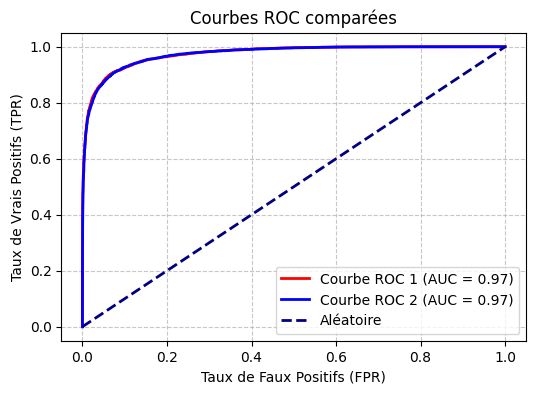

In [6]:
# Tracer les deux courbes ROC sur le même graphique
plt.figure(figsize=(6, 4))

# Tracer la courbe ROC du premier fichier
plt.plot(fpr1, tpr1, color='red', lw=2, label=f'Courbe ROC 1 (AUC = {roc_auc1:.2f})')

# Tracer la courbe ROC du deuxième fichier
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'Courbe ROC 2 (AUC = {roc_auc2:.2f})')

# Tracer la ligne de référence pour un modèle aléatoire (diagonale)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire')

# Ajouter des labels aux axes
plt.xlabel('Taux de Faux Positifs (FPR)')  # Axe X : Taux de faux positifs
plt.ylabel('Taux de Vrais Positifs (TPR)')  # Axe Y : Taux de vrais positifs

# Ajouter un titre au graphique
plt.title('Courbes ROC comparées')

# Ajouter une légende pour identifier les courbes
plt.legend(loc='lower right')

# Ajouter une grille pour améliorer la lisibilité
plt.grid(True, linestyle='--', alpha=0.7)
# Afficher le graphique
plt.show()

Les deux modèles présentent des performances similaires, car leurs courbes ROC sont proches l'une de l'autre.  
Elles se situent bien au-dessus de la diagonale, indiquant que les modèles surpassent largement le hasard.  
De plus, les performances semblent excellentes, car les courbes s'approchent rapidement du coin supérieur gauche, atteignant un taux de vrais positifs proche de 1 dès les faibles valeurs de faux positifs.

# **2) Quelques matrices de confusion pour le premier fichier:**

In [7]:
# Afficher les matrices de confusion pour quelques seuils représentatifs
seuils1 = [np.min(scores1), np.percentile(scores1, 25), np.median(scores1), np.percentile(scores1, 75), np.max(scores1)]
seuils2 = [np.min(scores2), np.percentile(scores2, 25), np.median(scores2), np.percentile(scores2, 75), np.max(scores2)]


Quelques matrices de confusion pour le premier fichier:


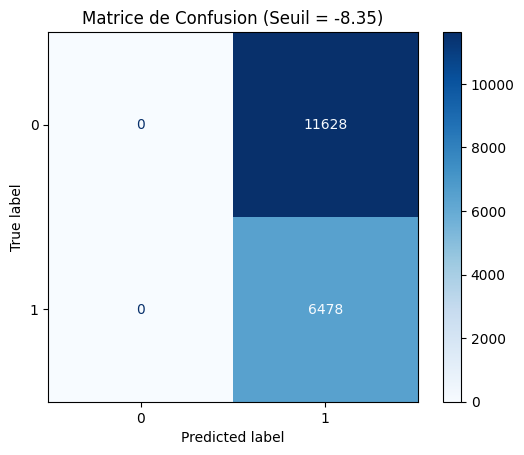

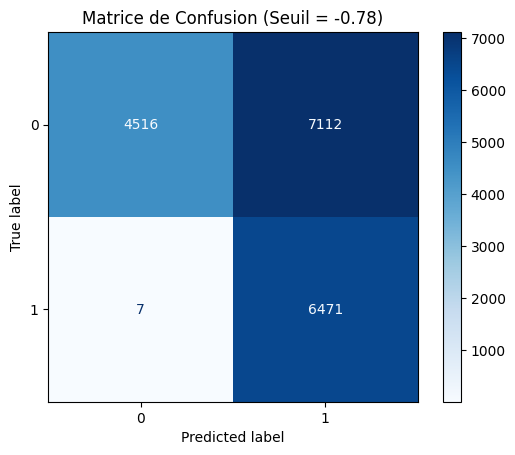

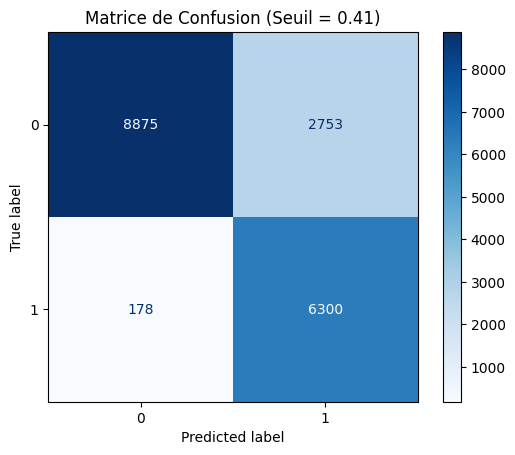

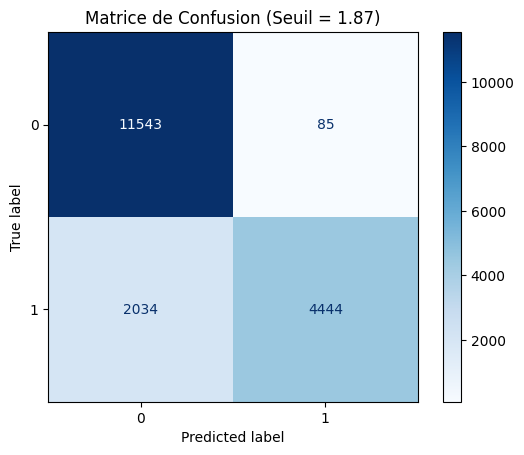

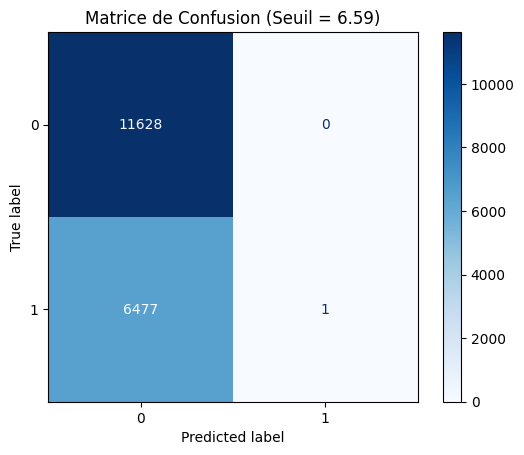

In [8]:
print("Quelques matrices de confusion pour le premier fichier:")
for seuil in seuils1:
    predictions = np.where(scores1 >= seuil, 1, 0)
    cm = confusion_matrix(labels1, predictions)

    # Afficher la matrice de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f'Matrice de Confusion (Seuil = {seuil:.2f})')
    plt.show()

# **3) Quelques matrices de confusion pour le deuxiemme fichier:**

Quelques matrices de confusion pour le deuxiemme fichier:


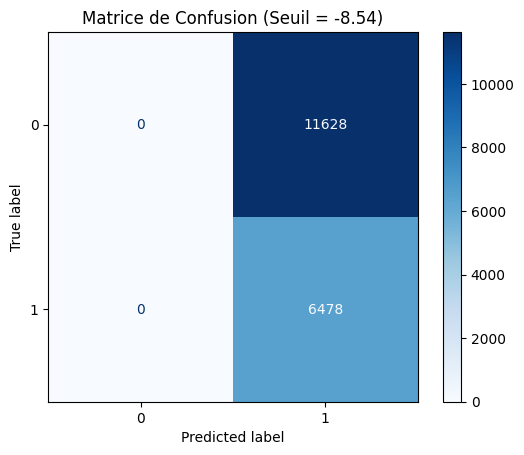

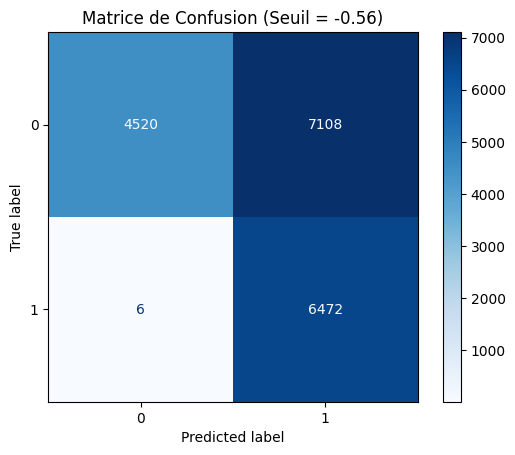

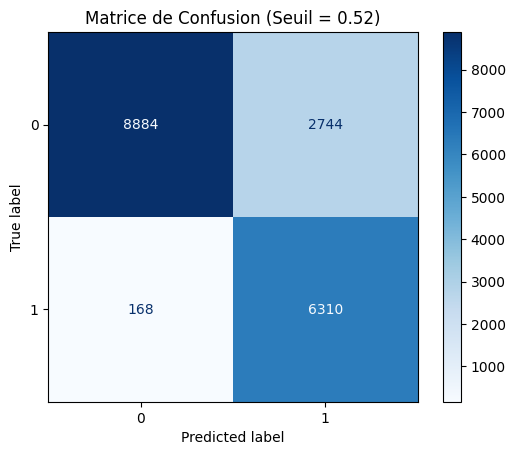

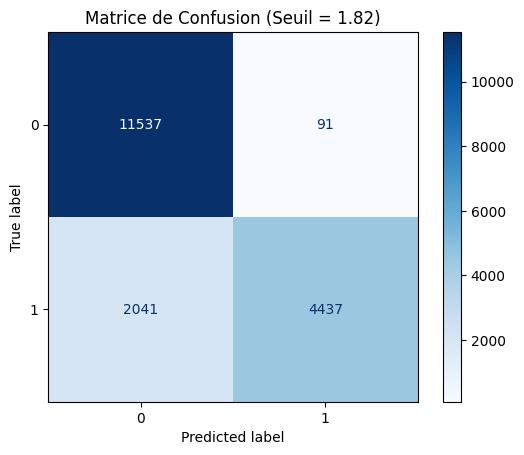

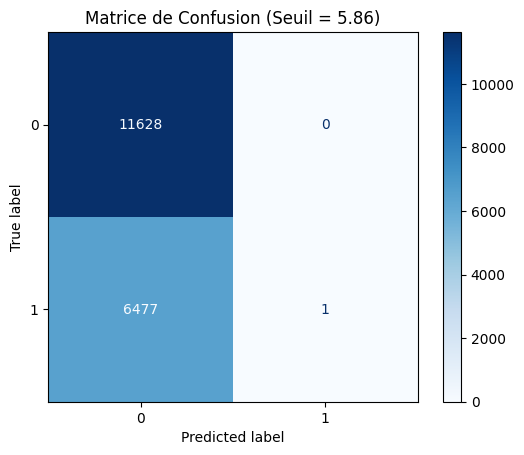

In [9]:
print("Quelques matrices de confusion pour le deuxiemme fichier:")
for seuil in seuils2:
    predictions = np.where(scores2 >= seuil, 1, 0)
    cm = confusion_matrix(labels2, predictions)

    # Afficher la matrice de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f'Matrice de Confusion (Seuil = {seuil:.2f})')
    plt.show()

# **4) La courbe Précision-Rappel**

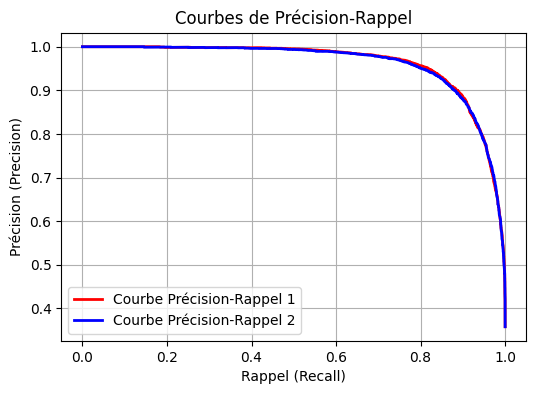

In [10]:
from sklearn.metrics import precision_recall_curve, det_curve

# Calculer les courbes de précision-rappel pour les deux fichiers
precision1, recall1, _ = precision_recall_curve(labels1, scores1)
precision2, recall2, _ = precision_recall_curve(labels2, scores2)

# Tracer les courbes de précision-rappel sur le même graphique
plt.figure(figsize=(6, 4))

# Tracer la courbe de précision-rappel du premier fichier
plt.plot(recall1, precision1, color='red', lw=2, label='Courbe Précision-Rappel 1')

# Tracer la courbe de précision-rappel du deuxième fichier
plt.plot(recall2, precision2, color='blue', lw=2, label='Courbe Précision-Rappel 2')

# Ajouter des labels et une légende
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbes de Précision-Rappel')
plt.legend(loc='lower left')
plt.grid(True)

# Afficher le graphique
plt.show()



Les deux modèles ont une très bonne performance globale, avec une précision proche de 1 pour une large gamme de recall.   
À haut recall, la précision chute, indiquant que l'augmentation des vrais positifs entraîne une hausse des faux positifs.  

# **5) La courbe DET**

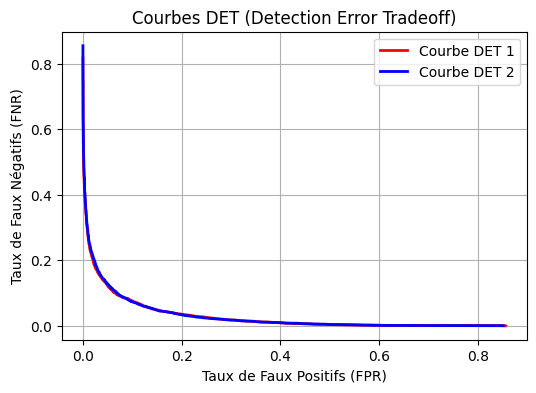

In [11]:
# Calculer les taux d'erreur pour la courbe DET
fpr1, fnr1, _ = det_curve(labels1, scores1)
fpr2, fnr2, _ = det_curve(labels2, scores2)

# Tracer la courbe DET
plt.figure(figsize=(6, 4))

# Tracer la courbe DET du premier fichier
plt.plot(fpr1, fnr1, color='red', lw=2, label='Courbe DET 1')

# Tracer la courbe DET du deuxième fichier
plt.plot(fpr2, fnr2, color='blue', lw=2, label='Courbe DET 2')

# Ajouter des labels et une légende
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Faux Négatifs (FNR)')
plt.title('Courbes DET (Detection Error Tradeoff)')
plt.legend(loc='upper right')
plt.grid(True)

# Afficher le graphique
plt.show()

La courbe se situe dans le coin inferieur gauche ce qui signifie que le modele est performant (Proportion de negatifs mal classes et proportion de positifs mal detectes sont faibles)